In [11]:
import os 
import pandas as pd 
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

## Load Data

In [28]:
current_weather_data = pd.read_csv(r'C:\Users\eleni\PycharmProjects\SmartEnergyAgent\data\raw\current_weather_data.csv')
hourly_forecast_data = pd.read_csv(r'C:\Users\eleni\PycharmProjects\SmartEnergyAgent\data\raw\hourly_forecast_data.csv')

In [29]:
current_weather_data.head()

,Unnamed: 0,timestamp,temperature_2m,relative_humidity_2m,precipitation,rain,snowfall,weather_code,wind_speed_10m,wind_direction_10m,surface_pressure,cloud_cover,is_day,shortwave_radiation,weather_description,wind_direction_cardinal
0,0,2025-07-04 00:00:00+00:00,17.3,57,0.0,0.0,0.0,3,0.3,52,1027.5,100,0,0.0,Overcast,NE


In [30]:
hourly_forecast_data.head()

,Unnamed: 0,timestamp,temperature_2m,relative_humidity_2m,precipitation,rain,snowfall,weather_code,wind_speed_10m,wind_direction_10m,surface_pressure,cloud_cover,is_day,shortwave_radiation,weather_description,wind_direction_cardinal
0,0,2025-07-03 00:00:00+00:00,17.7,78,0.0,0.0,0.0,0,5.4,322,1019.6,0,0,0.0,Clear sky,NW
1,1,2025-07-03 01:00:00+00:00,17.6,74,0.0,0.0,0.0,0,5.8,323,1020.4,0,0,0.0,Clear sky,NW
2,2,2025-07-03 02:00:00+00:00,17.2,77,0.0,0.0,0.0,0,6.6,313,1020.8,0,0,0.0,Clear sky,NW
3,3,2025-07-03 03:00:00+00:00,16.9,68,0.0,0.0,0.0,0,6.7,314,1021.2,0,0,0.0,Clear sky,NW
4,4,2025-07-03 04:00:00+00:00,15.9,68,0.0,0.0,0.0,0,6.3,306,1021.7,0,0,0.0,Clear sky,NW


In [ ]:
hourly_forecast_data = hourly_forecast_data.drop(['snowfall', 'precipitation'], axis=1)
hourly_forecast_data['timestamp'] = pd.to_datetime(hourly_forecast_data['timestamp'])
hourly_forecast_data = hourly_forecast_data.set_index('timestamp')
hourly_forecast_data = hourly_forecast_data.sort_index()

In [34]:
nan_counts_per_column = hourly_forecast_data.isna().sum()
print(nan_counts_per_column)

Unnamed: 0                 0
temperature_2m             0
relative_humidity_2m       0
rain                       0
weather_code               0
wind_speed_10m             0
wind_direction_10m         0
surface_pressure           0
cloud_cover                0
is_day                     0
shortwave_radiation        0
weather_description        0
wind_direction_cardinal    0
dtype: int64


 # Plot

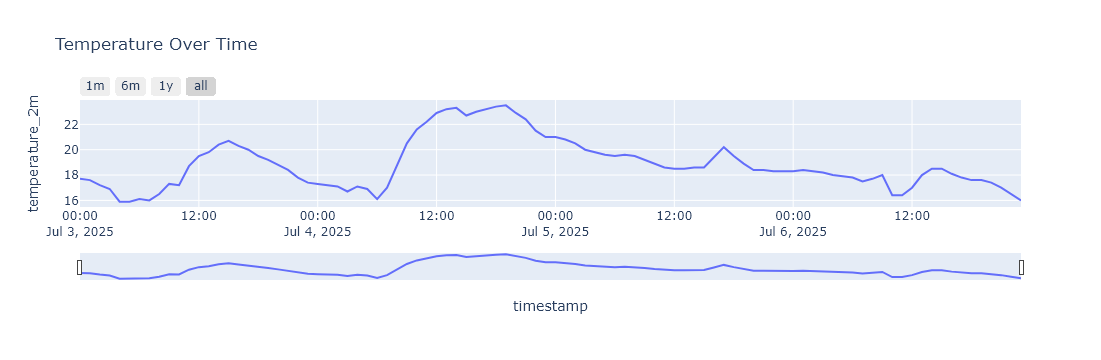

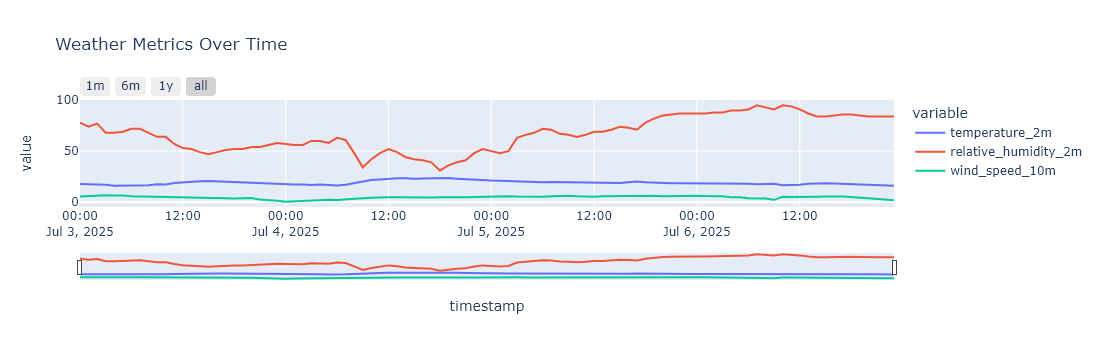

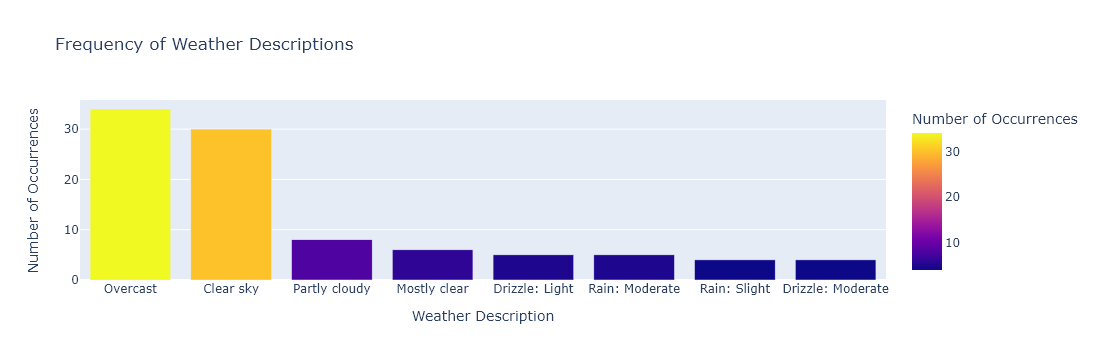

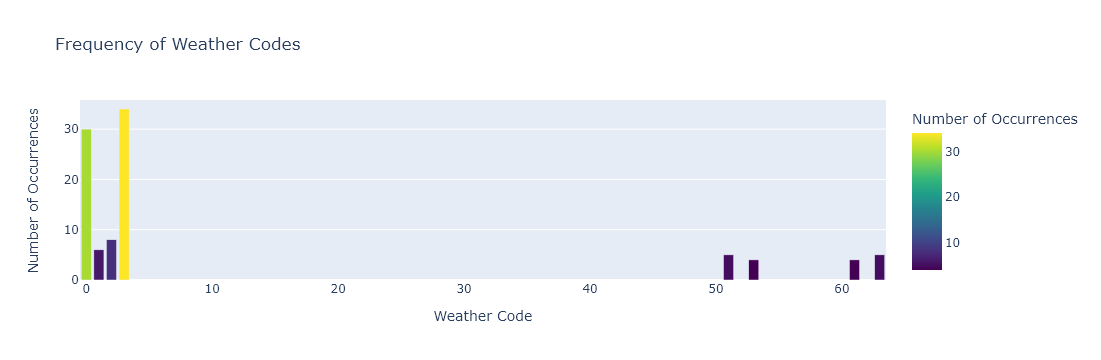

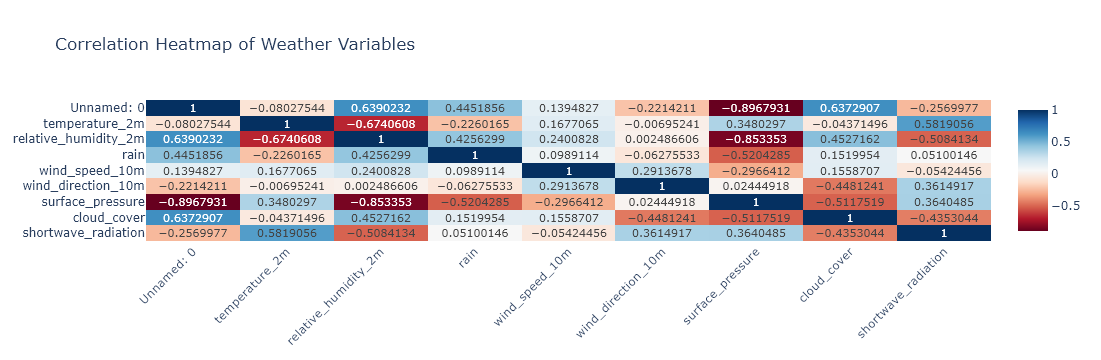

In [31]:


# --- 1. Time Series Plot for Temperature ---
fig_temp = px.line(hourly_forecast_data, y='temperature_2m', title='Temperature Over Time')
fig_temp.update_xaxes(
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    ),
    rangeslider=dict(visible=True),
    type="date"
)
fig_temp.update_layout(hovermode="x unified") 
fig_temp.show()


fig_multi_ts = px.line(hourly_forecast_data, y=['temperature_2m', 'relative_humidity_2m', 'wind_speed_10m'],
                       title='Weather Metrics Over Time')
fig_multi_ts.update_xaxes(
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    ),
    rangeslider=dict(visible=True),
    type="date"
)
fig_multi_ts.update_layout(hovermode="x unified")
fig_multi_ts.show()

# --- 2. Bar Charts for Frequency of Weather Codes or Descriptions ---

weather_desc_counts = hourly_forecast_data['weather_description'].value_counts().reset_index()
weather_desc_counts.columns = ['weather_description', 'count']

fig_desc_freq = px.bar(weather_desc_counts, x='weather_description', y='count',
                       title='Frequency of Weather Descriptions',
                       labels={'weather_description': 'Weather Description', 'count': 'Number of Occurrences'},
                       color='count', 
                       color_continuous_scale=px.colors.sequential.Plasma) 
fig_desc_freq.update_xaxes(categoryarray=weather_desc_counts['weather_description'].tolist()) 
fig_desc_freq.show()

# Frequency of 'weather_code' 
weather_code_counts = hourly_forecast_data['weather_code'].value_counts().reset_index()
weather_code_counts.columns = ['weather_code', 'count']

fig_code_freq = px.bar(weather_code_counts, x='weather_code', y='count',
                       title='Frequency of Weather Codes',
                       labels={'weather_code': 'Weather Code', 'count': 'Number of Occurrences'},
                       color='count',
                       color_continuous_scale=px.colors.sequential.Viridis)
fig_code_freq.update_xaxes(categoryarray=weather_code_counts['weather_code'].tolist()) # Order by frequency
fig_code_freq.show()

# --- 3. Correlation Heatmap ---
numerical_df = hourly_forecast_data.select_dtypes(include=['number'])
numerical_df = numerical_df.drop(columns=['is_day', 'weather_code'], errors='ignore') 
correlation_matrix = numerical_df.corr()

fig_corr = px.imshow(correlation_matrix,
                     text_auto=True,  aspect="auto",  color_continuous_scale=px.colors.sequential.RdBu,  title="Correlation Heatmap of Weather Variables")

fig_corr.update_layout(
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    xaxis_nticks=len(correlation_matrix.columns),
    yaxis_nticks=len(correlation_matrix.index),
    xaxis_tickangle=-45
)

fig_corr.show()

In [32]:
correlation_matrix

,Unnamed: 0,temperature_2m,relative_humidity_2m,rain,wind_speed_10m,wind_direction_10m,surface_pressure,cloud_cover,shortwave_radiation
Unnamed: 0,1.000000,-0.080275,0.639023,0.445186,0.139483,-0.221421,-0.896793,0.637291,-0.256998
temperature_2m,-0.080275,1.000000,-0.674061,-0.226016,0.167707,-0.006952,0.348030,-0.043715,0.581906
relative_humidity_2m,0.639023,-0.674061,1.000000,0.425630,0.240083,0.002487,-0.853353,0.452716,-0.508413
rain,0.445186,-0.226016,0.425630,1.000000,0.098911,-0.062755,-0.520429,0.151995,0.051001
wind_speed_10m,0.139483,0.167707,0.240083,0.098911,1.000000,0.291368,-0.296641,0.155871,-0.054245
wind_direction_10m,-0.221421,-0.006952,0.002487,-0.062755,0.291368,1.000000,0.024449,-0.448124,0.361492
surface_pressure,-0.896793,0.348030,-0.853353,-0.520429,-0.296641,0.024449,1.000000,-0.511752,0.364048
cloud_cover,0.637291,-0.043715,0.452716,0.151995,0.155871,-0.448124,-0.511752,1.000000,-0.435304
shortwave_radiation,-0.256998,0.581906,-0.508413,0.051001,-0.054245,0.361492,0.364048,-0.435304,1.000000
